<a href="https://colab.research.google.com/github/abhishek0508/Machine-Learning-Assignments/blob/master/covid19medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_train="https://drive.google.com/open?id=1pECQ1_rXaf_LEYi-AmnJccz19TgfmLLD"
list_test="https://drive.google.com/open?id=1daYicgatjCEzo7veXQzJa1pBBtxOBUW8"

In [0]:
fluff, id = link_train.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('sample_train.csv')  
df = pd.read_csv('sample_train.csv')

In [7]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-04-30 13:16:37--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-04-30 13:16:37--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M  98.0MB/s    in 0.8s    

2020-04-30 13:16:38 (98.0 MB/s) - ‘Miniconda3-latest-Linu

In [8]:
!conda install -c https://conda.anaconda.org/rdkit rdkit=2015.09.2

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / -

In [0]:
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem 
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole

In [12]:
df['SMILES']

0           CCNC(C)C(NC)c1ccccc1
1               CONC(=O)c1cncnc1
2          CCNC1CCCN(Cc2ccsc2)C1
3        CC(NC(=O)CSCCN)c1ccccc1
4           CCC(CS)CN(C)c1ccccc1
                  ...           
8995    CC(O)CCNC(=O)CNCc1ccccc1
8996       N#Cc1cccc(-c2cnsc2)n1
8997      Cc1ccnc(NC(CN)C(C)C)c1
8998            CC(=O)CCc1cncnc1
8999         COCCC(=O)Nc1cnccc1C
Name: SMILES, Length: 9000, dtype: object

In [13]:
!pip install git+https://github.com/samoturk/mol2vec;

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-pdsb1pcx
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-pdsb1pcx
     |████████████████████████████████| 24.2 MB 80 kB/s 
     |████████████████████████████████| 294 kB 53.2 MB/s 
     |████████████████████████████████| 12.4 MB 55.5 MB/s 
     |████████████████████████████████| 780 kB 52.3 MB/s 
     |████████████████████████████████| 215 kB 50.4 MB/s 
     |████████████████████████████████| 103 kB 52.7 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 1.1 MB 48.9 MB/s 
     |████████████████████████████████| 351 kB 57.4 MB/s 
     |████████████████████████████████| 75 kB 4.8 MB/s 
     |████████████████████████████████| 914 kB 47.9 MB/s 
     |██████████████████

In [0]:
mdf= pd.read_csv('sample_train.csv')

In [0]:
target = mdf['BindingAffinity']
mdf.drop(columns='BindingAffinity',inplace=True)

In [16]:
mdf['SMILES']

0           CCNC(C)C(NC)c1ccccc1
1               CONC(=O)c1cncnc1
2          CCNC1CCCN(Cc2ccsc2)C1
3        CC(NC(=O)CSCCN)c1ccccc1
4           CCC(CS)CN(C)c1ccccc1
                  ...           
8995    CC(O)CCNC(=O)CNCc1ccccc1
8996       N#Cc1cccc(-c2cnsc2)n1
8997      Cc1ccnc(NC(CN)C(C)C)c1
8998            CC(=O)CCc1cncnc1
8999         COCCC(=O)Nc1cnccc1C
Name: SMILES, Length: 9000, dtype: object

In [0]:
mdf['mol'] = mdf['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

In [18]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-04-30 13:23:30--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.110.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.110.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  17.0MB/s    in 97s     

2020-04-30 13:25:07 (16.2 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [20]:
df['mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 
print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


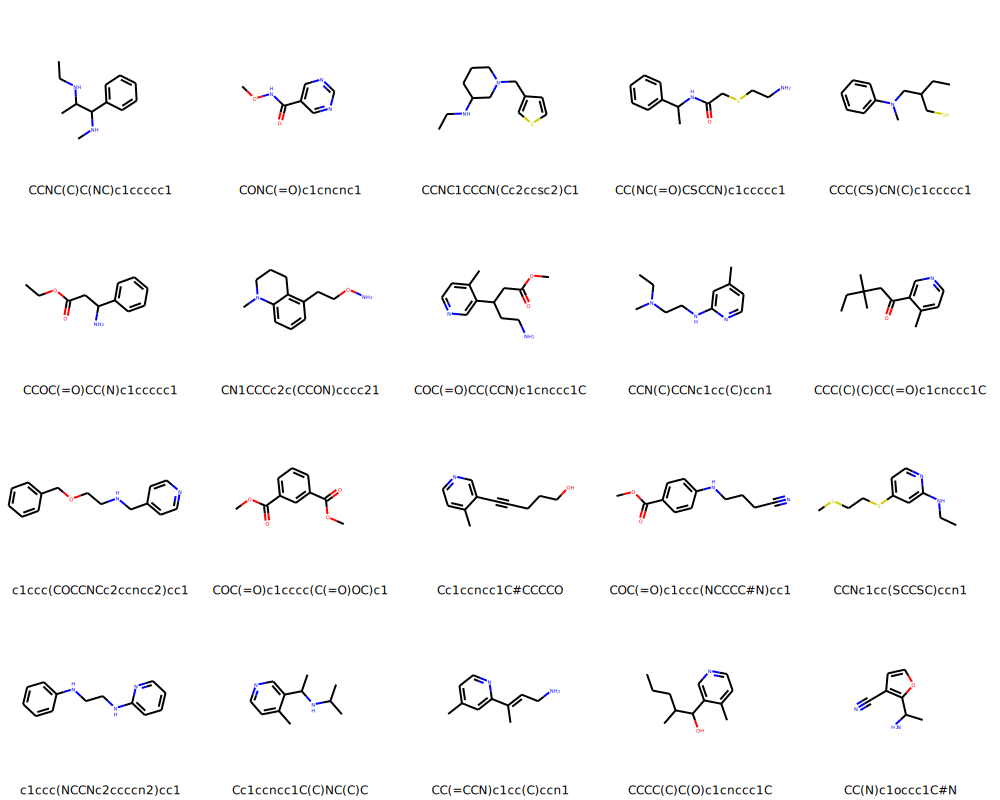

In [22]:
from rdkit.Chem import Draw
mols = df['mol'][:20]
#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['SMILES'][:20].values))


In [0]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())

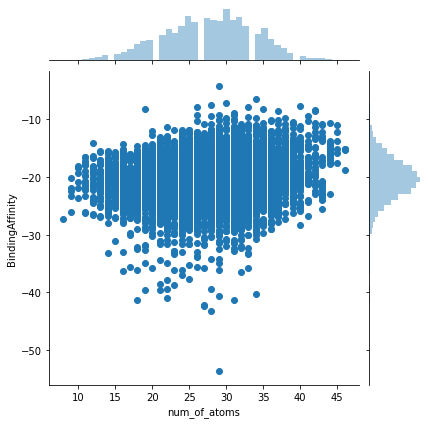

In [25]:
import seaborn as sns
sns.jointplot(df.num_of_atoms, df.BindingAffinity)
plt.show()

In [26]:
c_patt = Chem.MolFromSmiles('C')
print(df['mol'][0].GetSubstructMatches(c_patt))

((0,), (1,), (3,), (4,), (5,), (7,), (8,), (9,), (10,), (11,), (12,), (13,))


In [0]:
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], df)

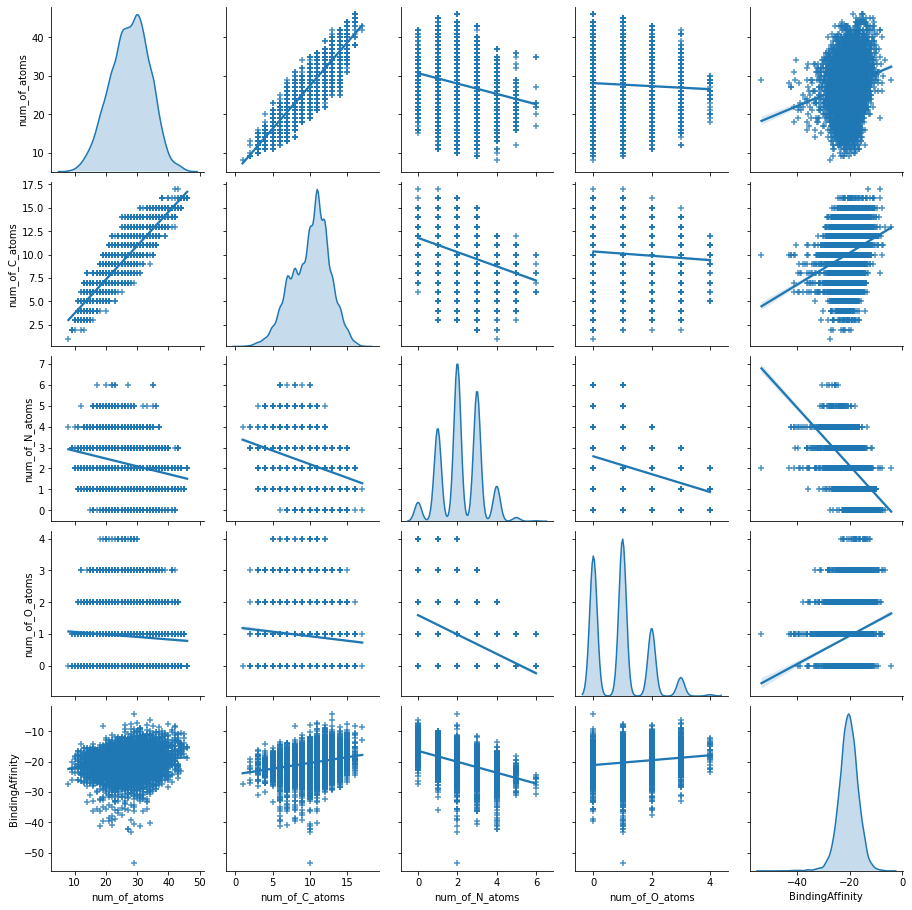

In [28]:
sns.pairplot(df[['num_of_atoms','num_of_C_atoms','num_of_N_atoms', 'num_of_O_atoms', 'BindingAffinity']], diag_kind='kde', kind='reg', markers='+')
plt.show()

In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
train_df = df.drop(columns=['SMILES', 'mol', 'BindingAffinity'])
y = df['BindingAffinity'].values
print(train_df.columns)
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1, random_state=1)

Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms'],
      dtype='object')


In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction[:300], "red", label="prediction", linewidth=1.0)
    plt.plot(y_test[:300], 'green', label="actual", linewidth=1.0)
    plt.legend()
    plt.ylabel('logP')
    plt.title("MAE {}, MSE {}".format(round(mae, 4), round(mse, 4)))
    plt.show()
    
    print('MAE score:', round(mae, 4))
    print('MSE score:', round(mse,4))

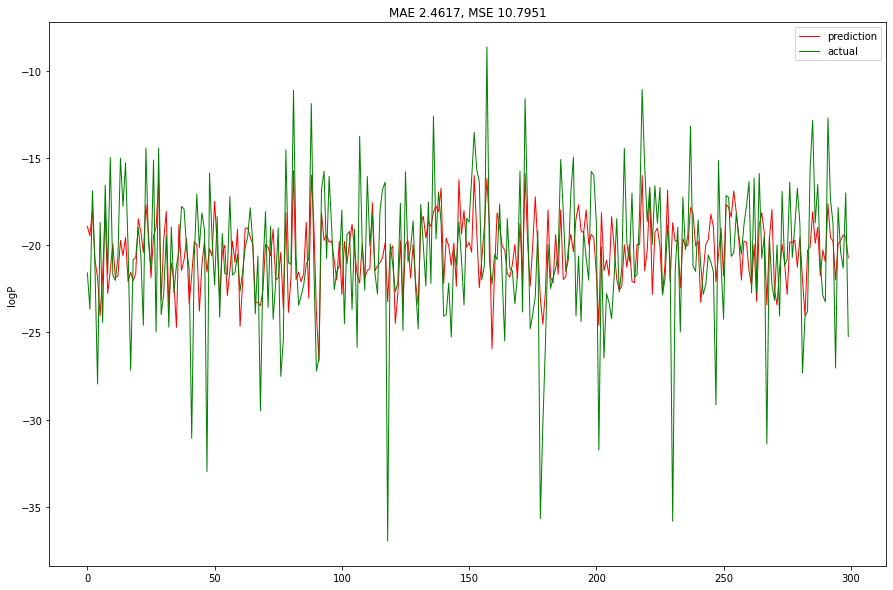

MAE score: 2.4617
MSE score: 10.7951


In [31]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
#Evaluate results
evaluation(ridge, X_test, y_test)

In [32]:
atp = Chem.MolFromSmiles('C1=NC2=C(C(=N1)N)N=CN2[C@H]3[C@@H]([C@@H]([C@H](O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O')
print('Number of rings with 1 backbone:', atp.GetRingInfo().NumAtomRings(1))
print('Number of rings with 2 backbones:', atp.GetRingInfo().NumAtomRings(2))

Number of rings with 1 backbone: 1
Number of rings with 2 backbones: 2


In [33]:
m = Chem.MolFromSmiles('C(=O)C(=N)CCl')
for atom in m.GetAtoms():
    print('Atom:', atom.GetSymbol(), 'Valence:', atom.GetExplicitValence())

Atom: C Valence: 3
Atom: O Valence: 2
Atom: C Valence: 4
Atom: N Valence: 2
Atom: C Valence: 2
Atom: Cl Valence: 1


In [0]:
from rdkit.Chem import Descriptors
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

In [38]:
train_df = df.drop(columns=['SMILES', 'mol', 'BindingAffinity'])
y = df['BindingAffinity'].values
print(train_df.columns)

Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'tpsa', 'mol_w',
       'num_valence_electrons', 'num_heteroatoms'],
      dtype='object')


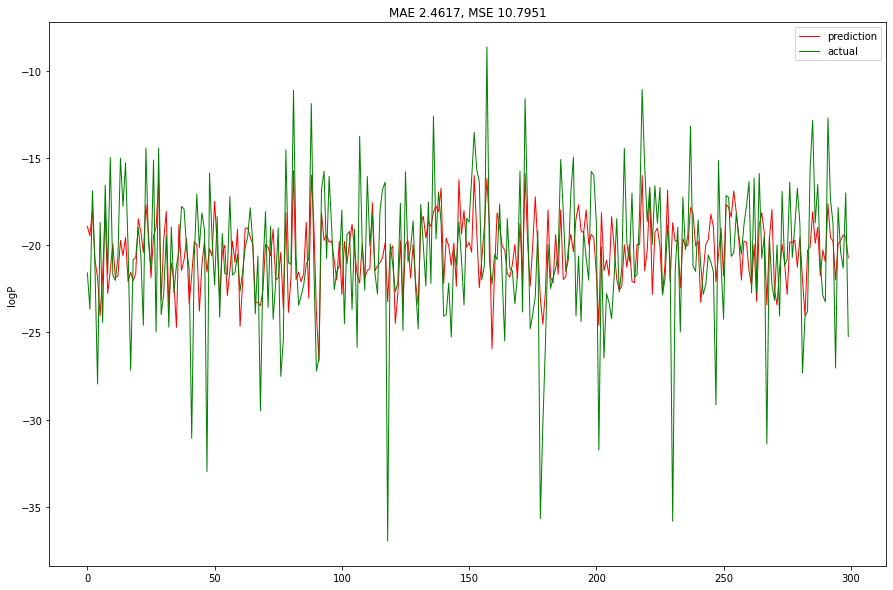

MAE score: 2.4617
MSE score: 10.7951


In [39]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
#Evaluate results and plot predictions
evaluation(ridge, X_test, y_test)

In [0]:
mdf= pd.read_csv('sample_train.csv')
target = mdf['BindingAffinity']
mdf.drop(columns='BindingAffinity',inplace=True)

In [0]:
mdf['mol'] = mdf['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

In [0]:
from gensim import models
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
w = models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE,binary=True)

In [43]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec
print('Molecular sentence:', mol2alt_sentence(mdf['mol'][1], radius=1))
print('\nMolSentence object:', MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)))
print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)), w, unseen='UNK')))

Molecular sentence: ['2246728737', '3975275337', '864674487', '903112553', '847961216', '2204949651', '2246699815', '1054767590', '864942730', '1510328189', '3217380708', '2994748777', '3218693969', '3777168895', '2041434490', '3118255683', '3218693969', '725322217', '2041434490', '3118255683', '3218693969', '3777168895']

MolSentence object: MolSentence with 22 words

DfVec object: (22, 300) dimensional vector


In [0]:
mdf['sentence'] = mdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

In [45]:
mdf['mol2vec'] = [DfVec(x) for x in sentences2vec(mdf['sentence'], w, unseen='UNK')]
X = np.array([x.vec for x in mdf['mol2vec']])
y = target.values
X.shape

(9000, 300)

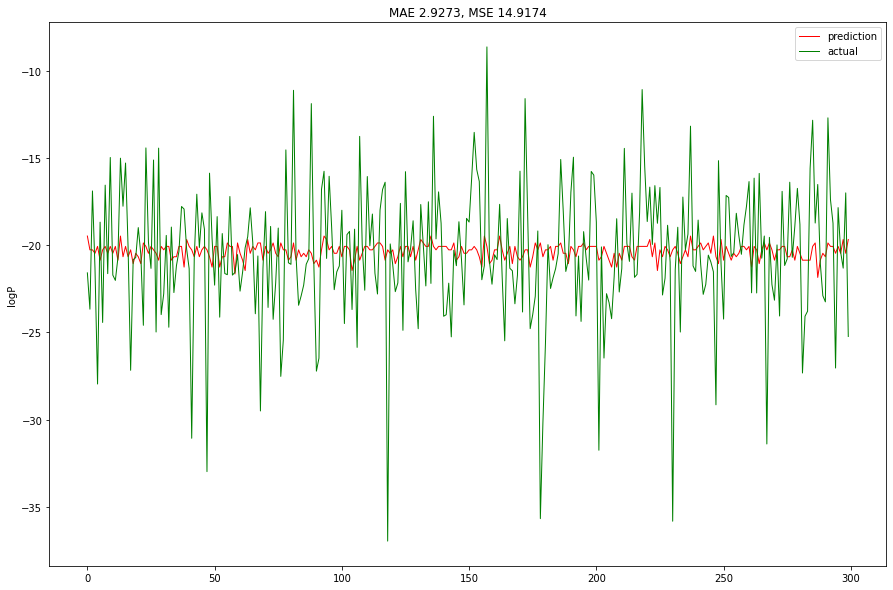

MAE score: 2.9273
MSE score: 14.9174


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
evaluation(ridge, X_test, y_test)

In [0]:
mdf = pd.DataFrame(X)
new_df = pd.concat((mdf, train_df), axis=1)

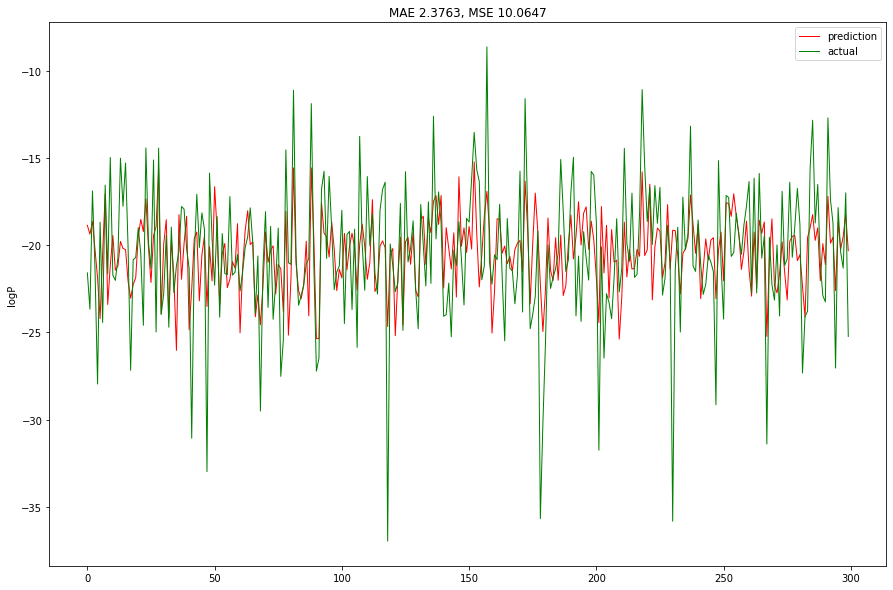

MAE score: 2.3763
MSE score: 10.0647


In [48]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=.1, random_state=1)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
evaluation(ridge, X_test, y_test)